In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from lime.lime_tabular import LimeTabularExplainer

In [9]:
df = pd.read_csv('titanic_train.csv')

print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [10]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
print(f"Liczba rekordów w zbiorze testowym: {len(X_test)}")

Liczba rekordów w zbiorze testowym: 268


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Confusion Matrix:
[[130  27]
 [ 32  79]]


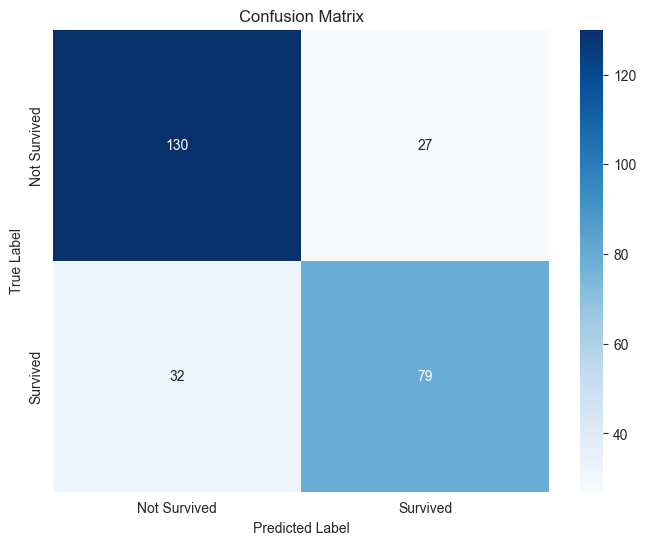

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
from lime.lime_tabular import LimeTabularExplainer


In [15]:
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    mode='classification'
)

In [16]:
X_test_with_labels = X_test.copy()
X_test_with_labels['True Label'] = y_test.values
X_test_with_labels['Predicted Label'] = y_pred

cases = {
    'True Negative (TN)': X_test_with_labels[
        (X_test_with_labels['True Label'] == 0) & (X_test_with_labels['Predicted Label'] == 0)
    ].iloc[0],
    'False Positive (FP)': X_test_with_labels[
        (X_test_with_labels['True Label'] == 0) & (X_test_with_labels['Predicted Label'] == 1)
    ].iloc[0],
    'False Negative (FN)': X_test_with_labels[
        (X_test_with_labels['True Label'] == 1) & (X_test_with_labels['Predicted Label'] == 0)
    ].iloc[0],
    'True Positive (TP)': X_test_with_labels[
        (X_test_with_labels['True Label'] == 1) & (X_test_with_labels['Predicted Label'] == 1)
    ].iloc[0]
}


In [17]:

for case_name, case_data in cases.items():
    explanation = explainer.explain_instance(
    data_row=case_data.drop(['True Label', 'Predicted Label']).values,
    predict_fn=lambda x: model.predict_proba(pd.DataFrame(x, columns=X.columns))
)
    
    print(f"\nCase: {case_name}")
    print(f"True Label: {case_data['True Label']}")
    print(f"Predicted Label: {case_data['Predicted Label']}")
    print(f"Observation Index: {case_data.name}")

    explanation.show_in_notebook()



Case: True Negative (TN)
True Label: 0
Predicted Label: 0
Observation Index: 439



Case: False Positive (FP)
True Label: 0
Predicted Label: 1
Observation Index: 396



Case: False Negative (FN)
True Label: 1
Predicted Label: 0
Observation Index: 709



Case: True Positive (TP)
True Label: 1
Predicted Label: 1
Observation Index: 720



Case: True Negative (TN)
True Label: 0
Predicted Label: 0
Observation Index: 439
Probabilities (Not Survived, Survived): [0.93 0.07]


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


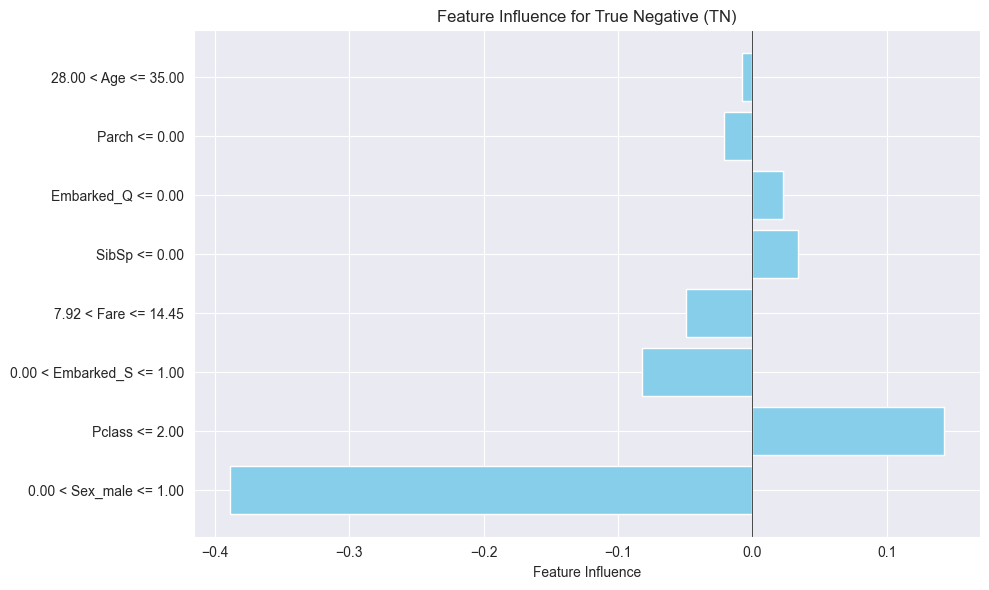


Case: False Positive (FP)
True Label: 0
Predicted Label: 1
Observation Index: 396
Probabilities (Not Survived, Survived): [0.45 0.55]


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


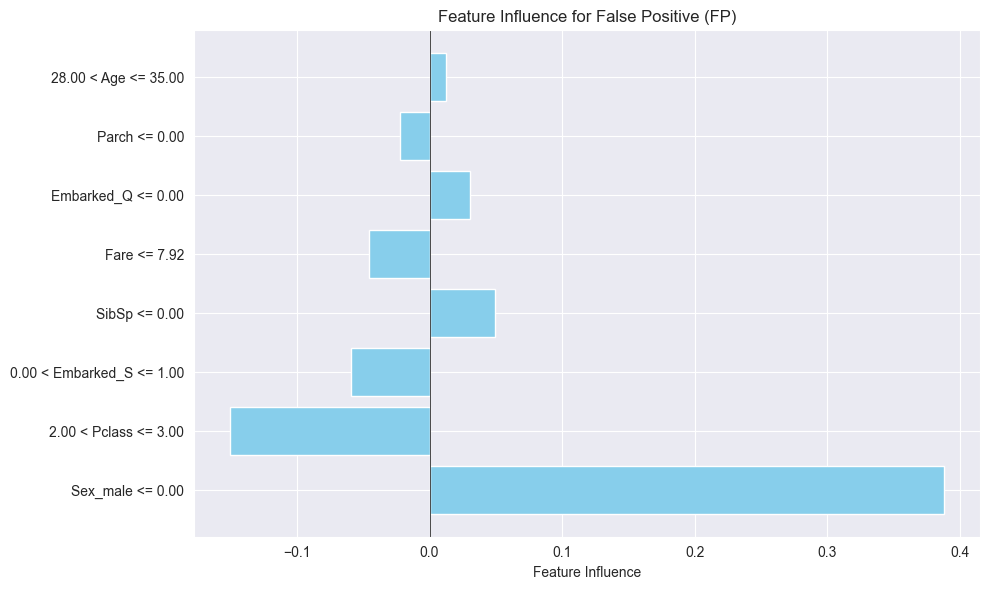


Case: False Negative (FN)
True Label: 1
Predicted Label: 0
Observation Index: 709
Probabilities (Not Survived, Survived): [0.71 0.29]


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


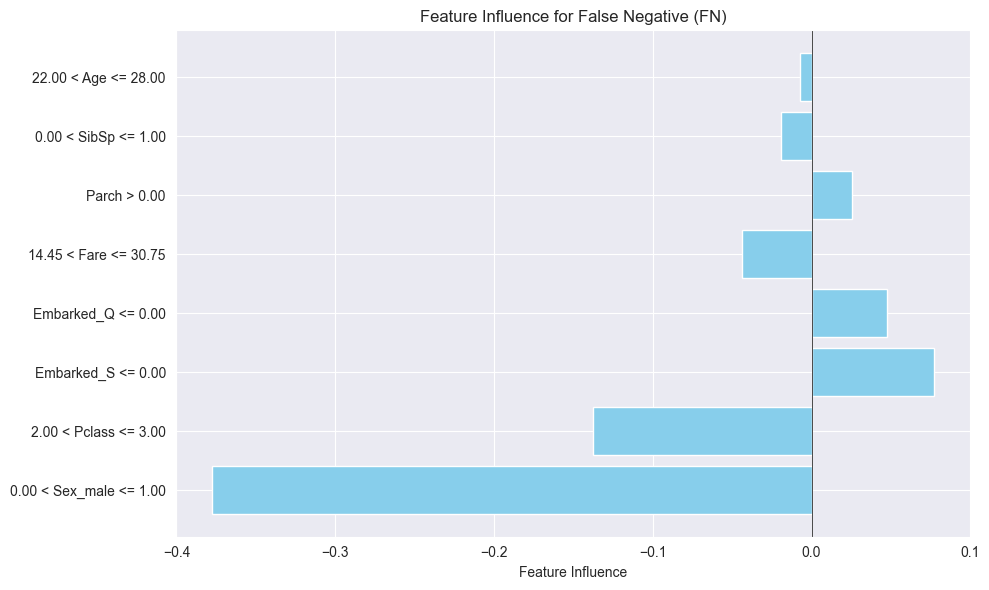


Case: True Positive (TP)
True Label: 1
Predicted Label: 1
Observation Index: 720
Probabilities (Not Survived, Survived): [0.04 0.96]


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


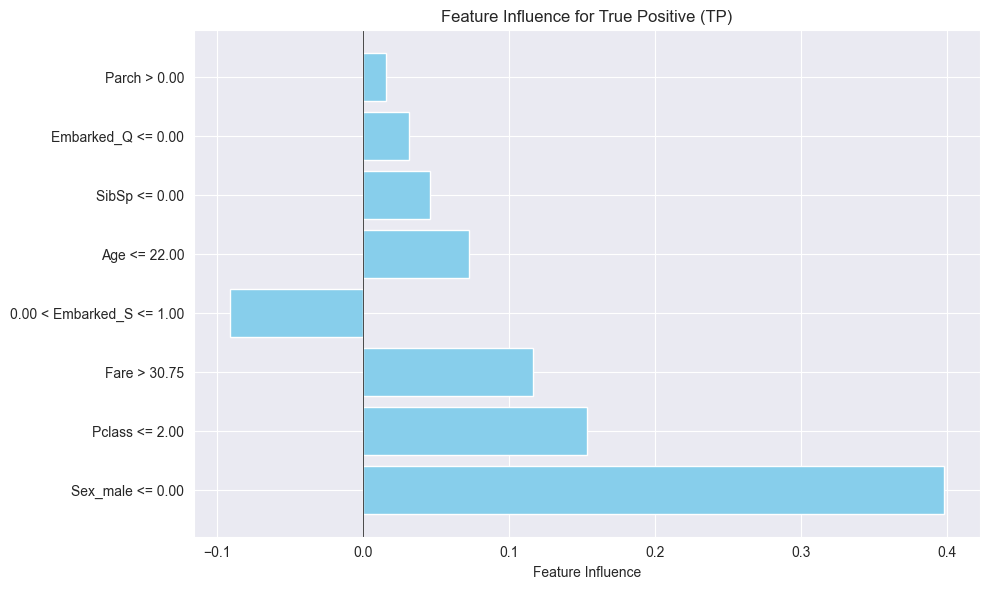

In [19]:
import matplotlib.pyplot as plt

# Funkcja do wizualizacji wpływu cech
def visualize_feature_influence(explanation, case_name):
    # Pobieranie cech i ich wpływów
    features, influences = zip(*explanation.as_list())
    
    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    plt.barh(features, influences, color='skyblue')
    plt.xlabel('Feature Influence')
    plt.title(f'Feature Influence for {case_name}')
    plt.axvline(0, color='black', linewidth=0.5)  # Linia zerowa
    plt.tight_layout()
    plt.show()

# Iteracja przez przypadki
for case_name, case_data in cases.items():
    explanation = explainer.explain_instance(
        data_row=case_data.drop(['True Label', 'Predicted Label']).values,
        predict_fn=lambda x: model.predict_proba(pd.DataFrame(x, columns=X.columns))
    )
    
    # Wyświetlenie wykresu dla danego przypadku
    print(f"\nCase: {case_name}")
    print(f"True Label: {case_data['True Label']}")
    print(f"Predicted Label: {case_data['Predicted Label']}")
    print(f"Observation Index: {case_data.name}")
    probabilities = model.predict_proba([case_data.drop(['True Label', 'Predicted Label']).values])[0]
    print(f"Probabilities (Not Survived, Survived): {probabilities}")
    
    visualize_feature_influence(explanation, case_name)
